In [14]:
%matplotlib inline

# Lab_4_2_Работа с базами данных SQLite с использованием Python и Pandas. Визуализация данных.


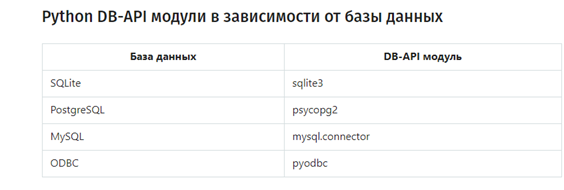

In [236]:
import pandas as pd
from six import print_

Подключаемся к SQLite3-базе


SQLite — это встраиваемая кроссплатформенная БД, которая поддерживает достаточно полный набор команд SQL и доступна в исходных кодах (на языке C).



Исходные коды SQLite находятся в public domain, то есть вообще никаких ограничений на использование.


SQLite – это автономный, работающий без сервера транзакционный механизм базы данных SQL. Python получил модуль sqlite3 в версии 2.5, что значит что вы можете создавать базу данных SQLite в любой настоящей версии Python, без необходимости скачивания дополнительных инструментов.




Библиотеку SQLite также не требуется устанавливать отдельно. Она есть в установочном пакете Python. Непосредственно модуль sqlite3 – это API к СУБД SQLite. Своего рода адаптер, который переводит команды, написанные на Питоне, в команды, которые понимает SQLite. Как и наоборот, доставляет ответы от SQLite в python-программу.

Модуль sqlite3 содержит много классов, функций и констант. Их перечень можно посмотреть с помощью функции dir().



О том как мы можем связать базы данных с пандами и преобразовать их в фреймы данных смотрим здесь https://medium.com/@devartimahakalkar/connecting-sql-datasets-with-pandas-105f8eb68f1a.

SQL примеры запросов
https://www.dataquest.io/blog/sql-basics/


In [237]:
# Импортируем библиотеку, соответствующую типу нашей базы данных 
import sqlite3
import sqlalchemy as sal
from sqlalchemy import create_engine

In [238]:
dir(sqlite3)

['Binary',
 'Connection',
 'Cursor',
 'DataError',
 'DatabaseError',
 'Date',
 'DateFromTicks',
 'Error',
 'IntegrityError',
 'InterfaceError',
 'InternalError',
 'NotSupportedError',
 'OperationalError',
 'OptimizedUnicode',
 'PARSE_COLNAMES',
 'PARSE_DECLTYPES',
 'PrepareProtocol',
 'ProgrammingError',
 'Row',
 'SQLITE_ALTER_TABLE',
 'SQLITE_ANALYZE',
 'SQLITE_ATTACH',
 'SQLITE_CREATE_INDEX',
 'SQLITE_CREATE_TABLE',
 'SQLITE_CREATE_TEMP_INDEX',
 'SQLITE_CREATE_TEMP_TABLE',
 'SQLITE_CREATE_TEMP_TRIGGER',
 'SQLITE_CREATE_TEMP_VIEW',
 'SQLITE_CREATE_TRIGGER',
 'SQLITE_CREATE_VIEW',
 'SQLITE_CREATE_VTABLE',
 'SQLITE_DELETE',
 'SQLITE_DENY',
 'SQLITE_DETACH',
 'SQLITE_DONE',
 'SQLITE_DROP_INDEX',
 'SQLITE_DROP_TABLE',
 'SQLITE_DROP_TEMP_INDEX',
 'SQLITE_DROP_TEMP_TABLE',
 'SQLITE_DROP_TEMP_TRIGGER',
 'SQLITE_DROP_TEMP_VIEW',
 'SQLITE_DROP_TRIGGER',
 'SQLITE_DROP_VIEW',
 'SQLITE_DROP_VTABLE',
 'SQLITE_FUNCTION',
 'SQLITE_IGNORE',
 'SQLITE_INSERT',
 'SQLITE_OK',
 'SQLITE_PRAGMA',
 'SQLITE_R

Вызов функции connect() приводит к созданию объекта-экземпляра от класса Connection. Этот объект обеспечивает связь с файлом базы данных, представляет конкретную БД в программе:

Все данные для работы в базе данных SQLite flights.db, которая содержит три таблицы - airports, airlines, и routes. Вы можете скачать данные здесь https://www.dropbox.com/s/a2wax843eniq12g/flights.db?dl=0



Чтобы работать с базой данных SQLite из Python, нам сначала нужно подключиться к ней. Мы можем сделать это с помощью функции connect , которая возвращает объект Connection :

In [239]:

conn = sqlite3.connect(r"C:\Users\Alsu1\Desktop\ИТИС_2020-21\VIZ\flights.db")

Когда у нас есть объект Connection, мы можем создать объект Cursor . Курсоры позволяют нам выполнять SQL-запросы к базе данных:

In [240]:
cur = conn.cursor()

Когда у нас есть объект Cursor, мы можем использовать его для выполнения запроса к базе данных с метко названным методом execute . Приведенный ниже код будет извлекать первые 5строки из airlinesтаблицы:

In [241]:
cur.execute("select * from airlines limit 5;")

Мы можем использовать метод fetchall для получения всех результатов запроса:

In [242]:
results = cur.fetchall()
print(results)

[(0, '1', 'Private flight', '\\N', '-', None, None, None, 'Y'), (1, '2', '135 Airways', '\\N', None, 'GNL', 'GENERAL', 'United States', 'N'), (2, '3', '1Time Airline', '\\N', '1T', 'RNX', 'NEXTIME', 'South Africa', 'Y'), (3, '4', '2 Sqn No 1 Elementary Flying Training School', '\\N', None, 'WYT', None, 'United Kingdom', 'N'), (4, '5', '213 Flight Unit', '\\N', None, 'TFU', None, 'Russia', 'N')]


результаты отформатированы как список кортежей . Каждый кортеж соответствует строке в базе данных, к которой мы обращались. Такой способ работы с данными довольно болезненный. Нам нужно будет вручную добавить заголовки столбцов и вручную проанализировать данные. К счастью, у библиотеки pandas есть более простой способ, который мы рассмотрим в следующем разделе.

Прежде чем мы продолжим, рекомендуется закрыть открытые объекты Connection и Cursor. Это предотвращает блокировку базы данных SQLite. Когда база данных SQLite заблокирована, вы не сможете обновить базу данных и можете получить ошибки. Мы можем закрыть Курсор и Соединение следующим образом:

In [243]:
cur.close()


In [244]:
conn.close()

# Отображение аэропортов


Используя наши новые знания о запросах, мы можем создать график, показывающий, где находятся все аэропорты мира. Сначала мы запрашиваем широту и долготу:

In [245]:
import sqlite3
conn = sqlite3.connect(r"C:\Users\Alsu1\Desktop\ИТИС_2020-21\VIZ\flights.db")
cur = conn.cursor()
coords = cur.execute("""
select cast(longitude as float),
cast(latitude as float)
from airports;""").fetchall()

Этот запрос будет извлекать latitudeи longitudeстолбцы airports. Затем мы вызываем fetchallметод для их получения.

Затем нам нужно настроить наше построение, импортировав matplotlib , основную библиотеку построения графиков для Python. В сочетании с пакетом базовых карт это позволяет нам создавать карты только с использованием Python.

Сначала нам нужно импортировать библиотеки:

In [246]:
import os
os.environ["PROJ_LIB"] = r'C:\Users\Alsu1\Anaconda3\Library\lib'
from mpl_toolkits.basemap import Basemap

In [247]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

Затем мы настраиваем нашу карту и рисуем континенты и береговые линии, которые образуют фон нашей карты:

In [248]:
#!pip install basemap

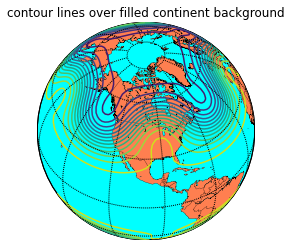

In [249]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()

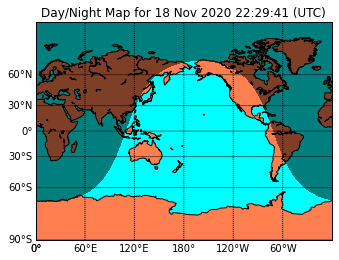

In [252]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime
# miller projection
map = Basemap(projection='mill',lon_0=180)
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
date = datetime.utcnow()
CS=map.nightshade(date)
plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


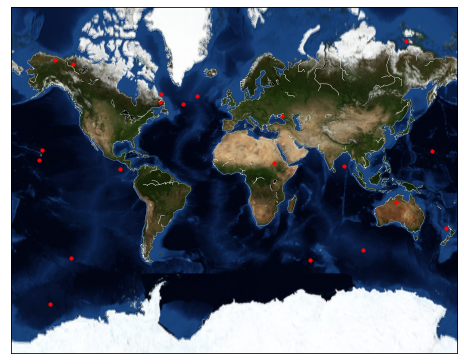

In [253]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# make up some data for scatter plot
lats = np.random.randint(-75, 75, size=20)
lons = np.random.randint(-179, 179, size=20)

fig = plt.gcf()
fig.set_size_inches(8, 6.5)

m = Basemap(projection='merc', \
            llcrnrlat=-80, urcrnrlat=80, \
            llcrnrlon=-180, urcrnrlon=180, \
            lat_ts=20, \
            resolution='c')

m.bluemarble(scale=0.2)   # full scale will be overkill
m.drawcoastlines(color='white', linewidth=0.2)  # add coastlines

x, y = m(lons, lats)  # transform coordinates
plt.scatter(x, y, 10, marker='o', color='Red') 

plt.show()

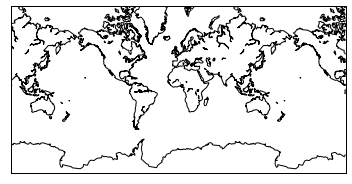

In [262]:
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-280,urcrnrlon=280,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawmapboundary()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


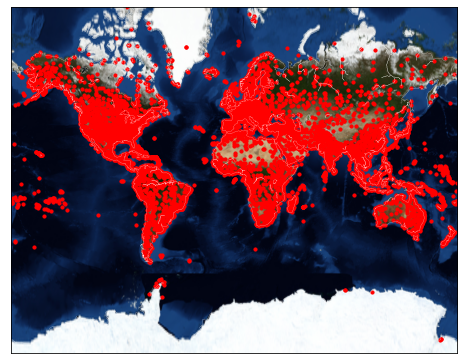

In [260]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap



fig = plt.gcf()
fig.set_size_inches(8, 6.5)

m = Basemap(projection='merc', \
            llcrnrlat=-80, urcrnrlat=80, \
            llcrnrlon=-180, urcrnrlon=180, \
            lat_ts=20, \
            resolution='c')

m.bluemarble(scale=0.2)   # full scale will be overkill
m.drawcoastlines(color='white', linewidth=0.2)  # add coastlines
x, y = m( [l[0] for l in coords],[l[1] for l in coords])

plt.scatter(x, y, 10, marker='o', color='Red') 

plt.show()

Наконец, мы наносим на карту координаты каждого аэропорта. Мы получили список кортежей из базы данных SQLite. Первый элемент в каждом кортеже - это долгота аэропорта, а второй - широта. Мы преобразуем долготу и широту в их собственные списки, а затем нанесем их на карту:

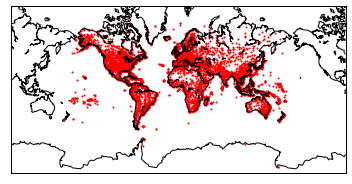

In [263]:
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-280,urcrnrlon=280,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawmapboundary()
x, y = m( [l[0] for l in coords],[l[1] for l in coords])
m.scatter(x, y, 1, marker='o', color='red')

In [ ]:
В итоге мы получаем карту, на которой показаны все аэропорты мира:

## Чтение результатов в фрейм данных pandas

Мы можем использовать функцию pandas read_sql_query для чтения результатов SQL-запроса непосредственно в фрейм данных pandas. Приведенный ниже код выполнит тот же запрос, что и мы, но вернет DataFrame. У него есть несколько преимуществ по сравнению с запросом, который мы сделали выше:

Это не требует от нас создания объекта Cursor или вызова fetchallв конце.

Он автоматически считывает названия заголовков из таблицы.

Он создает DataFrame, чтобы мы могли быстро изучить данные.

In [184]:
import pandas as pd
import sqlite3
conn = sqlite3.connect(r"C:\Users\Alsu1\Desktop\ИТИС_2020-21\VIZ\flights.db")
df = pd.read_sql_query("select * from airlines limit 5;", conn)
df

,index,id,name,alias,iata,icao,callsign,country,active
0,0,1,Private flight,\N,-,None,None,None,Y
1,1,2,135 Airways,\N,None,GNL,GENERAL,United States,N
2,2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,3,4,2 Sqn No 1 Elementary Flying Training School,\N,None,WYT,None,United Kingdom,N
4,4,5,213 Flight Unit,\N,None,TFU,None,Russia,N


In [185]:
df["country"]

0              None
1     United States
2      South Africa
3    United Kingdom
4            Russia
Name: country, dtype: object

Теперь, когда мы знаем, как читать запросы в DataFrames pandas, мы можем создать карту каждого маршрута авиалинии в мире. Сначала мы запрашиваем данные. Следующий запрос:

Получите широту и долготу исходного аэропорта для каждого маршрута.

Получите широту и долготу аэропорта назначения для каждого маршрута.

Преобразуйте все значения координат в числа с плавающей запятой.

Считайте результаты в DataFrame и сохраните их в переменной routes.

In [186]:
routes = pd.read_sql_query("""
select cast(sa.longitude as float) as source_lon,
cast(sa.latitude as float) as source_lat,
cast(da.longitude as float) as dest_lon,
cast(da.latitude as float) as dest_lat
from routes
inner join airports sa on sa.id = routes.source_id
inner join airports da on da.id = routes.dest_id;
""",
conn)

In [ ]:
m = Basemap(
projection='merc',
llcrnrlat=-80,
urcrnrlat=80,
llcrnrlon=-180,
urcrnrlon=180,
lat_ts=20,
resolution='c'
)
m.drawcoastlines()

Мы перебираем первые 3000ряды и рисуем их. Приведенный ниже код будет:

Пропустите первые 3000ряды routes.
Выясните, не слишком ли длинный маршрут.
Если маршрут не слишком длинный:
Нарисуйте круг между исходной точкой и пунктом назначения.

In [ ]:
for name, row in routes[:3000].iterrows():
if abs(row["source_lon"] - row["dest_lon"]) < 90:
# Draw a great circle between source and dest airports.
m.drawgreatcircle(
row["source_lon"],
row["source_lat"],
row["dest_lon"],
row["dest_lat"],
linewidth=1,
color='b'
)

Вышеупомянутое гораздо эффективнее, когда мы используем pandas для преобразования результатов SQL-запроса в DataFrame вместо работы с необработанными результатами из sqlite3.

# Задание. 

В этой лабораторной работе мы будем работать со следующим набором данных: https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

Загрузите и распакуйте архив https://yadi.sk/d/NC2FWVHn32YaUs . После распаковки у вас должен появится файл service311.db . В случае другого названия после распаковки переименуйте его в service311.db .


Список всех колонок и 5 строк

In [139]:
# Read in SQLite databases
con = sqlite3.connect(r"C:\Users\Alsu1\Desktop\ИТИС_2020-21\VIZ\service311.db")
#Read the Table
df = pd.read_sql_query("SELECT * FROM service311 LIMIT 200 ", con)
#close the connection

df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,,11360,27-16 203 STREET,...,,,,,,,,40.7735,-73.7882,"(40.773539552542, -73.78823697228408)"
1,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,,,,,,,,40.767,-73.9794,"(40.76702142171206, -73.97944780718524)"
2,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,,,,,,,,40.8527,-73.9106,"(40.85267061877697, -73.91060771362552)"
3,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,,,,,,,,40.7558,-73.8833,"(40.755773786469966, -73.88326243225418)"
4,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,,,,,,,,40.6762,-73.9513,"(40.67617516102934, -73.9512690004692)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,31793985,10/19/2015 09:00:17 PM,10/22/2015 05:21:28 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11203,5417 KINGS HIGHWAY,...,,,,,,,,40.641,-73.9256,"(40.64103095778472, -73.92557815868905)"
196,31918126,11/05/2015 01:29:07 PM,11/05/2015 04:03:35 PM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418,119-07 89 AVENUE,...,,,,,,,,40.6974,-73.8294,"(40.69739141705009, -73.82941056751595)"
197,31577456,09/20/2015 04:27:46 PM,09/20/2015 08:36:35 PM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11201,68 BERGEN STREET,...,,,,,,,,40.6869,-73.9909,"(40.6868952248265, -73.99090992128471)"
198,30190360,03/16/2015 05:41:40 PM,03/16/2015 06:14:25 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11356,22-14 120 STREET,...,,,,,,,,40.7798,-73.8479,"(40.77975999330358, -73.84788171442551)"


In [140]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [141]:

df = pd.read_sql_query("SELECT * FROM service311 WHERE City='MANHATTAN' LIMIT 25 ", con)
#close the connection

df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,30334076,04/04/2015 07:18:24 PM,04/20/2015 01:06:40 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Billing Dispute,,10014.0,PIER 76 EAST 36 STRET,...,,,,,,,,,,
1,31945542,11/09/2015 04:54:43 PM,11/17/2015 04:20:24 PM,DOF,Senior Citizen Rent Increase Exemption Unit,SCRIE,Application Renewal,Senior Address,10013.0,,...,,,,,,,N/A,,,
2,29905317,02/09/2015 02:26:53 PM,04/11/2015 06:33:32 AM,DOHMH,Department of Health and Mental Hygiene,Food Establishment,Dishwashing/Utensils,Restaurant/Bar/Deli/Bakery,10011.0,PEIR 60 W 23 ST,...,,,,,,,,,,
3,30938520,06/25/2015 10:27:37 AM,09/29/2015 02:55:13 PM,DOT,Department of Transportation,Street Condition,"Rough, Pitted or Cracked Roads",Street,10025.0,350 CENTRAL PARKWAY,...,,,,,,,,,,
4,30169997,03/13/2015 11:30:24 AM,03/16/2015 02:19:21 PM,DOT,Department of Transportation,Street Condition,Defective Hardware,Street,10065.0,132A 165 STREET,...,,,,,,,,,,
5,30134320,03/09/2015 03:24:06 PM,03/10/2015 10:33:02 AM,DOT,Department of Transportation,Street Condition,Cave-in,Street,10038.0,35 DIVISON ST,...,,,,,,,,,,
6,29844094,02/02/2015 09:15:35 AM,02/02/2015 09:16:00 AM,TLC,Taxi and Limousine Commission,Taxi Report,Driver Report,,10280.0,355 SOUTH END AVE,...,,,,,,,,,,
7,30923732,06/24/2015 08:53:14 PM,07/10/2015 01:07:04 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Overcharge,,10003.0,4 UNION SQUARE SOUTH,...,,,,,,,,,,
8,30723492,05/29/2015 03:35:11 PM,06/14/2015 01:06:51 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Exchange/Refund/Return,,10025.0,PO BOX 1040 CATHEDRAL STATION,...,,,,,,,,,,
9,31721077,10/09/2015 11:01:35 AM,12/09/2015 06:35:26 AM,DOHMH,Department of Health and Mental Hygiene,Food Establishment,Food Spoiled,Other (Explain Below),10027.0,NA NA,...,,,,,,,,,,


### Задание. Придумайте  интересные запросы и  визуализации для этого набора данных (4-5) с помощью библиотек  Seaborn, Bokeh или других.

In [107]:
### YOUR CODE HERE

In [ ]:
con.close()

In [ ]:
Дополнительный материал
https://habr.com/ru/post/321510/

In [ ]:
https://www.pythoncentral.io/advanced-sqlite-usage-in-python/

In [ ]:
https://sebastianraschka.com/Articles/2014_sqlite_in_python_tutorial.html

In [187]:
# Интеграция PostgreSQL с Jupyter Notebook

In [189]:
!pip install ipython-sql 
#  генерирует операторы SQL из Python
!pip install sqlalchemy

  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13704 sha256=6a800ed9db0fde4034847bbe49b6a81f2f87113837df7a4cc9ee4a78e0b911b7
  Stored in directory: c:\users\alsu1\appdata\local\pip\cache\wheels\46\60\6c\bb25d05df22906786206e901e9354bb3061061191116768bee
Successfully built prettytable


In [190]:
#передает ваши операторы SQL в вашу базу данных Postgres
!pip install psycopg2

### Подключение к базе данных
Чтобы подключиться к вашей базе данных, вы должны сначала создать объект подключения, представляющий базу данных. Затем вы должны создать объект курсора, чтобы помочь вам в выполнении ваших операторов SQL.

В следующем примере показано, как установить соединение с базой данных с именем «postgres»: